<a href="https://colab.research.google.com/github/amanjain252002/Stock-Price-Prediction/blob/main/ARIMA_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!pip install pmdarima

In [30]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings

warnings.filterwarnings('ignore')

In [17]:
TSLA = pd.read_csv('Data/FB.csv')

The Dickey-Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series and help us understand if the series is stationary.

**Null Hypothesis**: The series has a unit root

**Alternate Hypothesis**: The series has no unit root.

If we fail to reject the Null Hypothesis, then the series is non-stationary.

In [18]:
def Test_Stationarity(timeseries):
    result = adfuller(timeseries['Adj Close'], autolag='AIC')
    print("Results of Dickey Fuller Test")
    print(f'Test Statistics: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Number of lags used: {result[2]}')
    print(f'Number of observations used: {result[3]}')
    for key, value in result[4].items():
        print(f'critical value ({key}): {value}')

#Tesla

In [19]:
TSLA.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,206.750000,209.789993,206.270004,209.779999,209.779999,12077100
1,2020-01-03,207.210007,210.399994,206.949997,208.669998,208.669998,11188400
2,2020-01-06,206.699997,212.779999,206.520004,212.600006,212.600006,17058900
3,2020-01-07,212.820007,214.580002,211.750000,213.059998,213.059998,14912400
4,2020-01-08,213.000000,216.240005,212.610001,215.220001,215.220001,13475000


In [20]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       428 non-null    object 
 1   Open       428 non-null    float64
 2   High       428 non-null    float64
 3   Low        428 non-null    float64
 4   Close      428 non-null    float64
 5   Adj Close  428 non-null    float64
 6   Volume     428 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 23.5+ KB


In [21]:
# Change Dtype of Date column
TSLA["Date"] = pd.to_datetime(TSLA["Date"])

In [22]:
Test_Stationarity(TSLA)

Results of Dickey Fuller Test
Test Statistics: -0.16826353665400937
p-value: 0.9422003031109558
Number of lags used: 3
Number of observations used: 424
critical value (1%): -3.445867291195605
critical value (5%): -2.868380822100627
critical value (10%): -2.5704139268867925


The p-value > 0.05, so we cannot reject the Null hypothesis. Hence, we would need to use the “Integrated (I)” concept, denoted by value ‘d’ in time series, to make the data stationary while building the Auto ARIMA model.

Now let's take log of the 'Adj Close' column to reduce the magnitude of the values and reduce the series rising trend.

Text(0.5, 1.0, 'Rolling Mean and Standard Deviation')

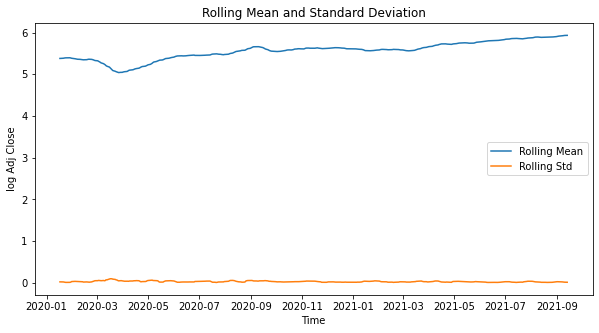

In [23]:
TSLA['log Adj Close'] = np.log(TSLA['Adj Close'])
TSLA_log_moving_avg = TSLA['log Adj Close'].rolling(12).mean()
TSLA_log_std = TSLA['log Adj Close'].rolling(12).std()

plt.figure(figsize=(10, 5))
plt.plot(TSLA['Date'], TSLA_log_moving_avg, label="Rolling Mean")
plt.plot(TSLA['Date'], TSLA_log_std, label="Rolling Std")
plt.xlabel('Time')
plt.ylabel('log Adj Close')
plt.legend(loc='best')
plt.title("Rolling Mean and Standard Deviation")

###Split the data into training and test set
    Training Period: 2015-01-02 - 2020-09-30

    Testing Period:  2020-10-01 - 2021-02-26

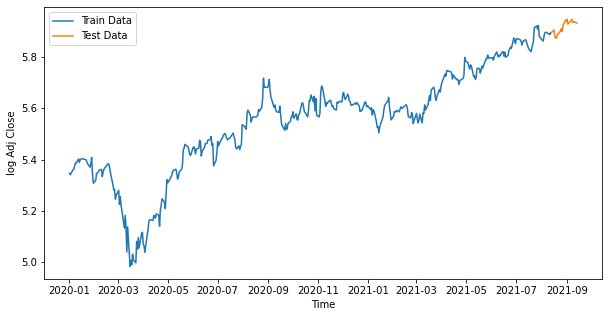

In [24]:
TSLA_Train_Data = TSLA[TSLA['Date'] < '2021-08-13']
TSLA_Test_Data = TSLA[TSLA['Date'] >= '2021-08-13'].reset_index(drop=True)

plt.figure(figsize=(10, 5))
plt.plot(TSLA_Train_Data['Date'], TSLA_Train_Data['log Adj Close'], label='Train Data')
plt.plot(TSLA_Test_Data['Date'], TSLA_Test_Data['log Adj Close'], label='Test Data')
plt.xlabel('Time')
plt.ylabel('log Adj Close')
plt.legend(loc='best')

###Modeling

In [25]:
TSLA_Auto_ARIMA_Model = auto_arima(TSLA_Train_Data['log Adj Close'], seasonal=False,
                                   error_action='ignore', suppress_warnings=True)
print(TSLA_Auto_ARIMA_Model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  407
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 917.304
Date:                Mon, 20 Sep 2021   AIC                          -1830.607
Time:                        17:23:10   BIC                          -1822.595
Sample:                             0   HQIC                         -1827.436
                                - 407                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1566      0.033     -4.714      0.000      -0.222      -0.092
sigma2         0.0006   2.86e-05     22.348      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   0.01   Jarque-

In [26]:
TSLA_ARIMA_Model = ARIMA(TSLA_Train_Data['log Adj Close'], order=(5, 2, 2))
TSLA_ARIMA_Model_Fit = TSLA_ARIMA_Model.fit()
print(TSLA_ARIMA_Model_Fit.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.26147D+00    |proj g|=  2.54202D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      3     49      2     0     0   5.475D-02  -2.263D+00
  F =  -2.2633779227372322     

ABNORMAL_TERMINATION_IN_LNSRCH                              
                             ARIMA Model Results                              
Dep. Variable:       D2.log Adj Close   No. Observations:                  405
Model:                 ARIMA(5, 2, 2)   Log Likelihood                 916.668
Method:                       css-mle   S.D. of innovations              0.025
Date:                Mon, 20 Sep 2021   AIC                          -1815.336
Time:                       

###Predicting the closing stock price of Tesla

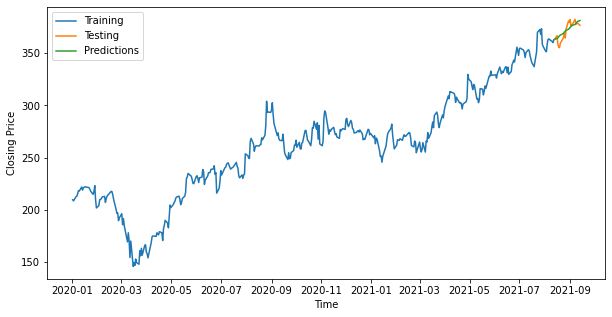

In [27]:
TSLA_output = TSLA_ARIMA_Model_Fit.forecast(21, alpha=0.05)
TSLA_predictions = np.exp(TSLA_output[0])
plt.figure(figsize=(10, 5))
plt.plot(TSLA_Train_Data['Date'], TSLA_Train_Data['Adj Close'], label='Training')
plt.plot(TSLA_Test_Data['Date'], TSLA_Test_Data['Adj Close'], label='Testing')
plt.plot(TSLA_Test_Data['Date'], TSLA_predictions, label='Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

In [28]:
rmse = math.sqrt(mean_squared_error(TSLA_Test_Data['Adj Close'], TSLA_predictions))
mape = np.mean(np.abs(TSLA_predictions - TSLA_Test_Data['Adj Close']) / np.abs(TSLA_Test_Data['Adj Close']))

print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')


RMSE: 5.432821472201959
MAPE: 0.011621525868602675
